In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-university-student-grades/Factors_ affecting_ university_student_grades_dataset.csv


In [2]:
def read_(path):
    df=pd.DataFrame()
    try:
        df=pd.read_csv(path)
    except Exception as e:
        print(e)
    finally:
        return df

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path='/kaggle/input/factors-affecting-university-student-grades/Factors_ affecting_ university_student_grades_dataset.csv'
df=read_(path)
print(f'Data Frame Shape is {df.shape}')
display(df.head())

Data Frame Shape is (10064, 35)


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
0,22.0,F,College,50000.0,A,81.0,Medium,8.0,Law,Private,...,Neutral,NaN,No,Visual,Yes,NaN,Low,2.0,NaN,B
1,21.0,M,NaN,60000.0,A,NaN,Medium,12.0,Law,Public,...,Negative,No,No,Auditory,Yes,Yes,Medium,5.0,High,NaN
2,19.0,M,College,75000.0,C,93.0,Medium,12.0,Law,Private,...,Neutral,No,Yes,NaN,No,No,Low,2.0,High,A
3,21.0,M,College,60000.0,A,86.0,Low,15.0,Business,Public,...,Neutral,No,NaN,Auditory,Yes,Yes,Low,3.0,Medium,C
4,19.0,NaN,NaN,40000.0,NaN,89.0,High,15.0,Medicine,NaN,...,Positive,No,No,Auditory,Yes,NaN,Medium,3.0,High,B


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10064 entries, 0 to 10063
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          9099 non-null   float64
 1   Gender                       9085 non-null   object 
 2   Parental_Education           9102 non-null   object 
 3   Family_Income                9097 non-null   object 
 4   Previous_Grades              9120 non-null   object 
 5   Attendance                   9060 non-null   float64
 6   Class_Participation          9098 non-null   object 
 7   Study_Hours                  9073 non-null   float64
 8   Major                        9136 non-null   object 
 9   School_Type                  9115 non-null   object 
 10  Financial_Status             9129 non-null   object 
 11  Parental_Involvement         9118 non-null   object 
 12  Educational_Resources        9129 non-null   object 
 13  Motivation      

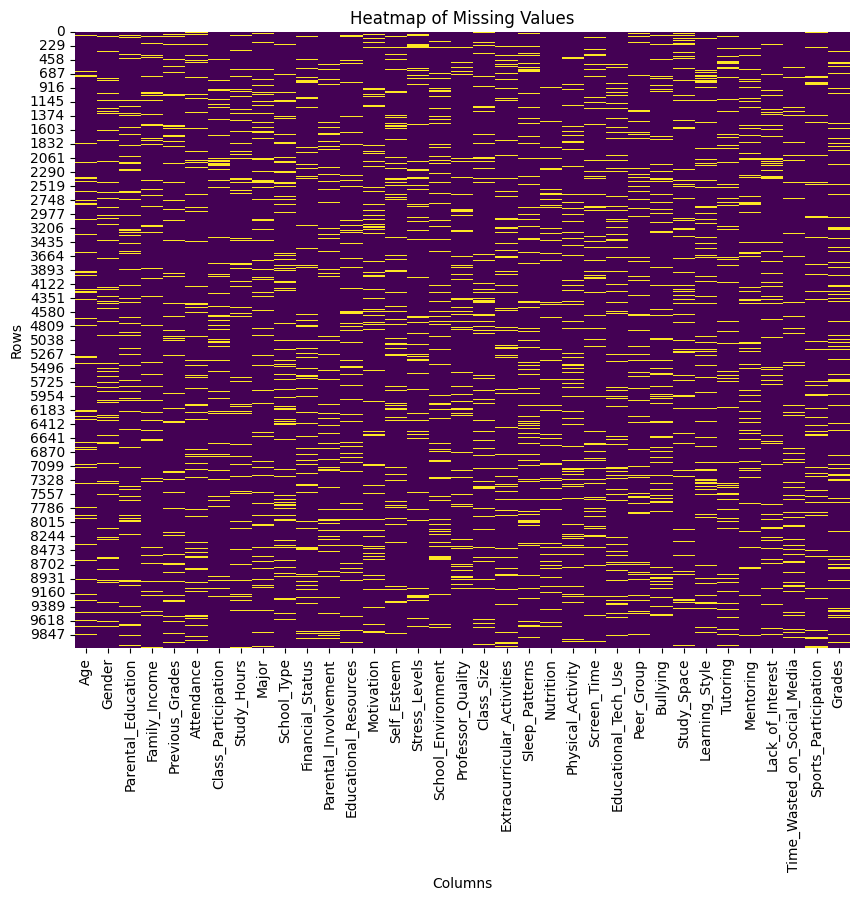

In [6]:
missing_data = df.isnull()

# 4. Create the heatmap
plt.figure(figsize=(10, 8)) 
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

The Data Set Is Severely Missy So We Will Fix As Much As Could 

In [7]:
from sklearn.impute import KNNImputer,SimpleImputer

In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

numerical_df = df[numerical_cols]
categorical_df = df[categorical_cols]

# 3. Impute numerical features using KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  
numerical_imputed = knn_imputer.fit_transform(numerical_df)
numerical_imputed_df = pd.DataFrame(numerical_imputed, columns=numerical_cols) 


mode_imputer = SimpleImputer(strategy='most_frequent')
categorical_imputed = mode_imputer.fit_transform(categorical_df)
categorical_imputed_df = pd.DataFrame(categorical_imputed, columns=categorical_cols)


In [9]:
df_imputed = pd.concat([numerical_imputed_df, categorical_imputed_df], axis=1)

# Ensure the order of columns is the same as the original df
df_imputed = df_imputed[df.columns]

In [10]:
df=df_imputed

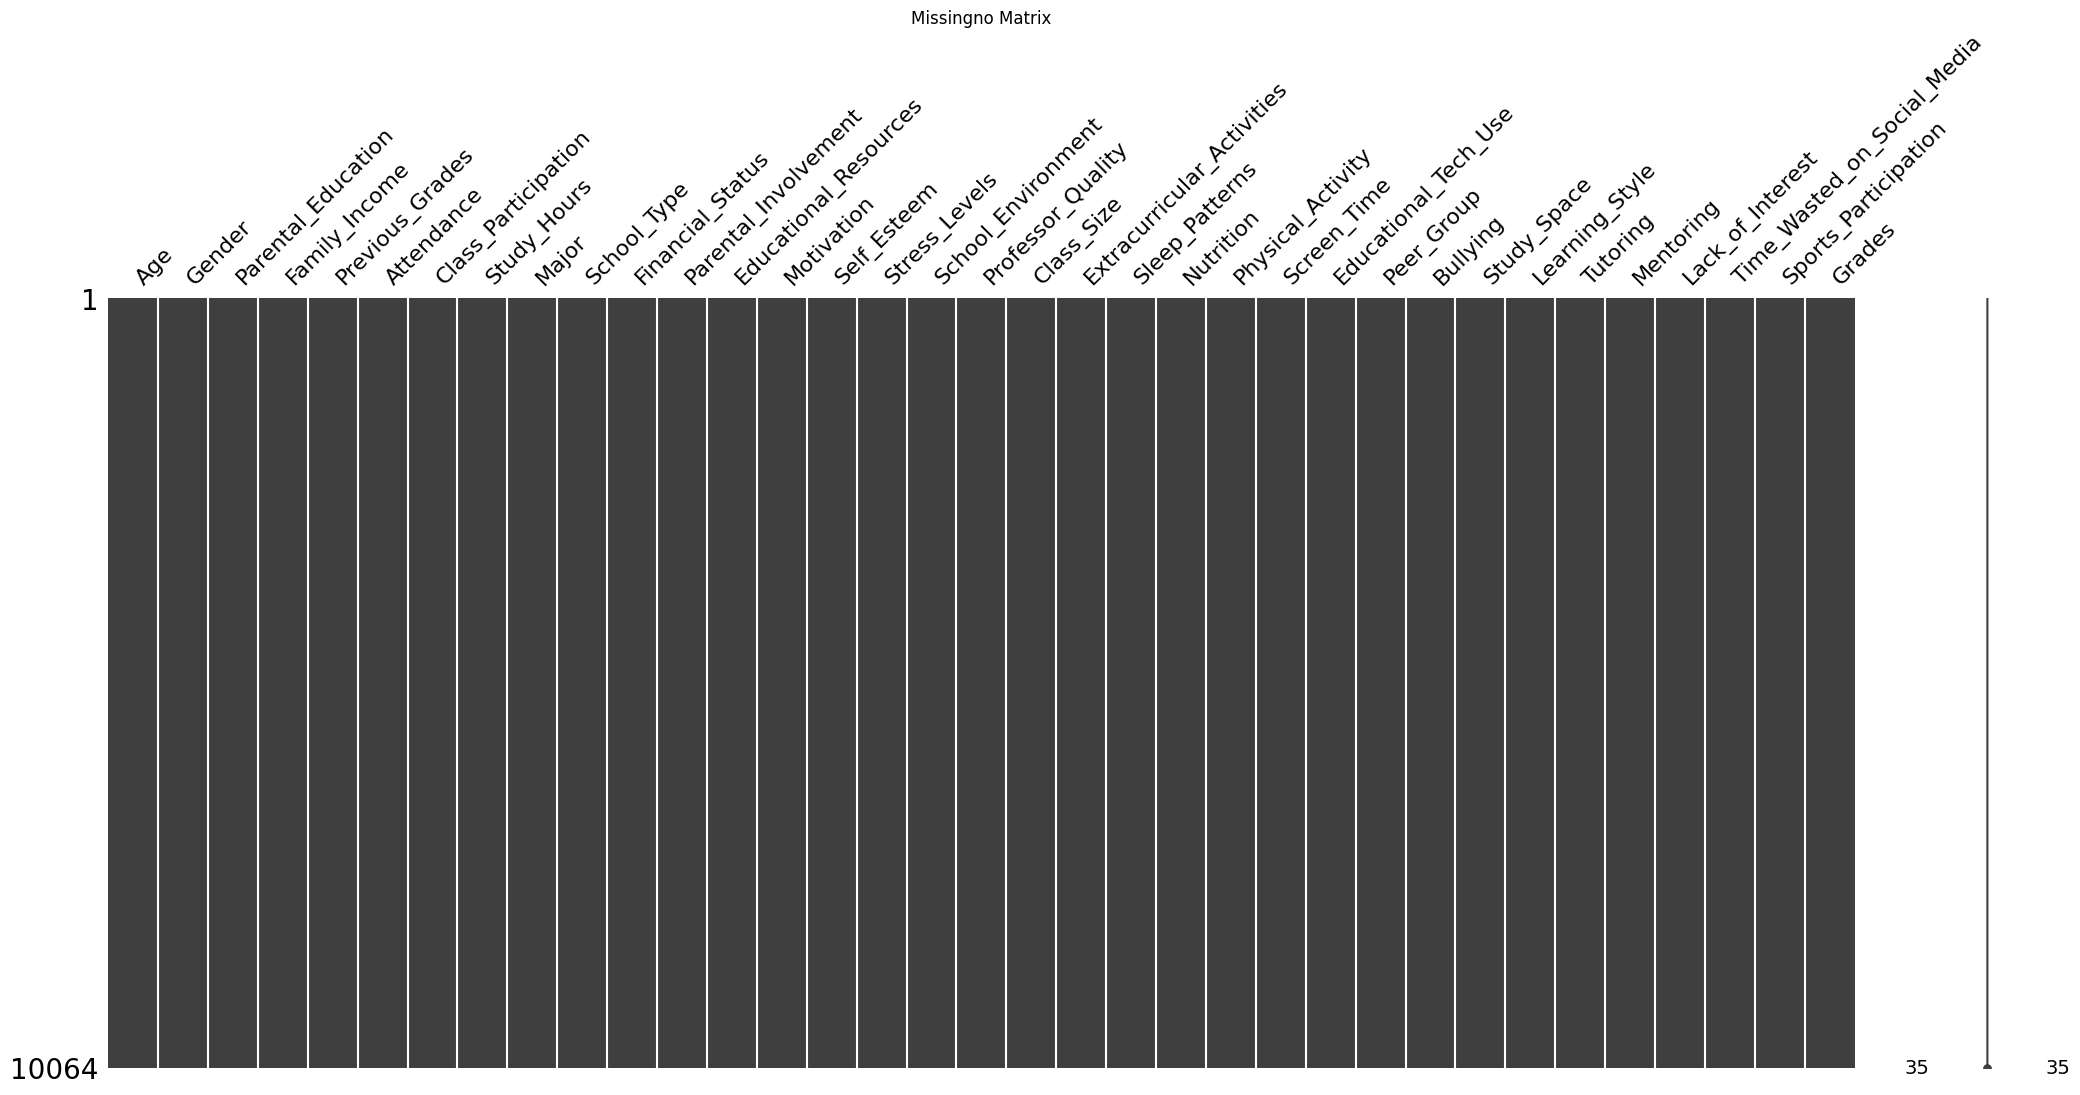

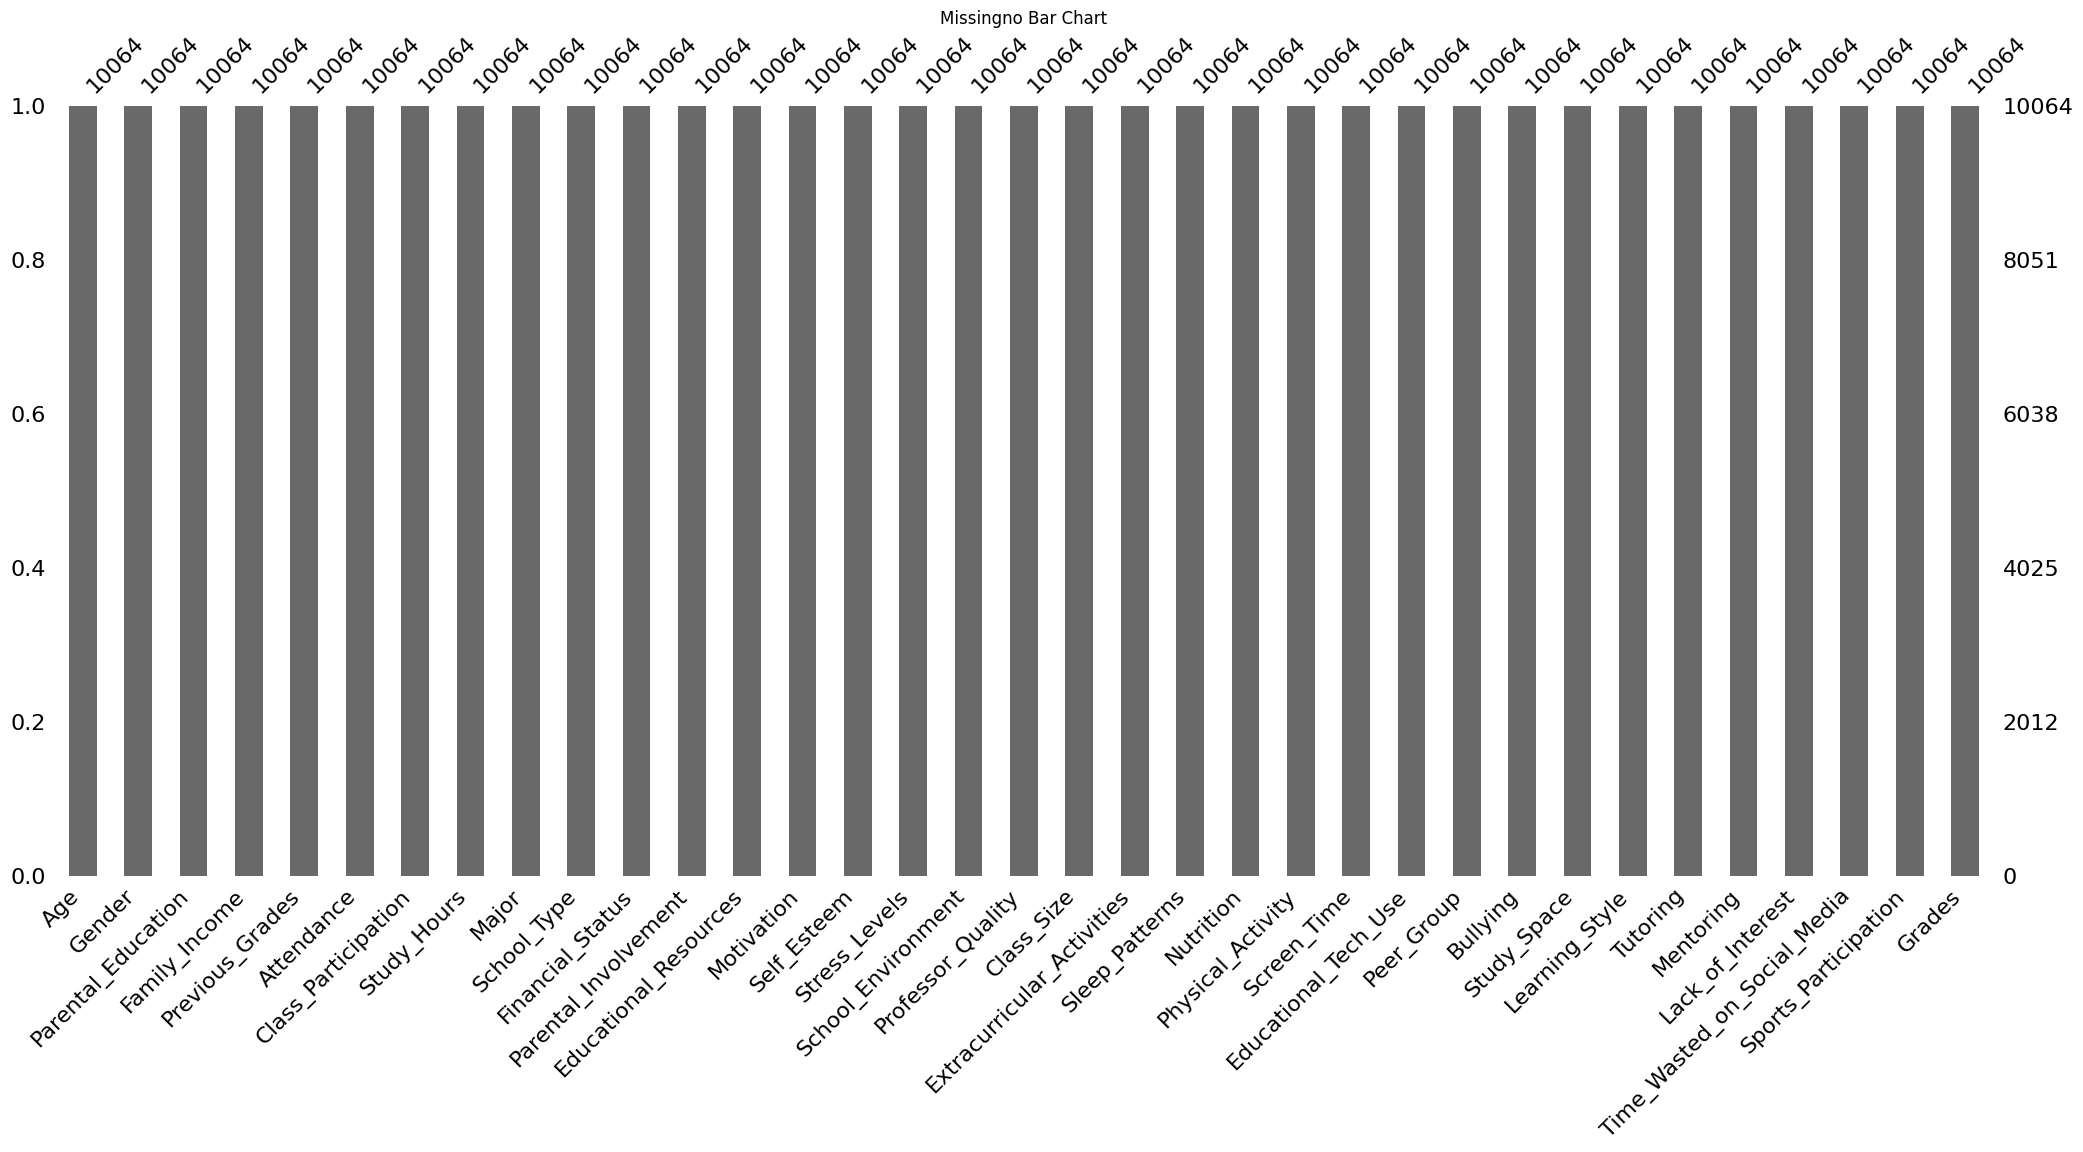

In [11]:
import missingno as msno

msno.matrix(df) 
plt.title('Missingno Matrix')
plt.show()
################
msno.bar(df) 
plt.title('Missingno Bar Chart')
plt.show()

In [12]:
for col in df.select_dtypes(include=['object','string']).columns:
    print(col)
    display(df[col].value_counts())

Gender


Gender
F    5536
M    4528
Name: count, dtype: int64

Parental_Education


Parental_Education
Some College    3285
Graduate        2277
College         2261
High School     2241
Name: count, dtype: int64

Family_Income


Family_Income
30000.0    2799
50000.0    1832
60000.0    1814
75000.0    1810
40000.0    1808
Unknown       1
Name: count, dtype: int64

Previous_Grades


Previous_Grades
C    4041
A    3036
B    2987
Name: count, dtype: int64

Class_Participation


Class_Participation
Medium    4013
Low       3026
High      3025
Name: count, dtype: int64

Major


Major
Business       2504
Law            1569
Arts           1516
Science        1507
Medicine       1494
Engineering    1474
Name: count, dtype: int64

School_Type


School_Type
Public     5529
Private    4535
Name: count, dtype: int64

Financial_Status


Financial_Status
Low       4003
Medium    3038
High      3023
Name: count, dtype: int64

Parental_Involvement


Parental_Involvement
High      4063
Medium    3057
Low       2944
Name: count, dtype: int64

Educational_Resources


Educational_Resources
Yes    5569
No     4495
Name: count, dtype: int64

Motivation


Motivation
High      4032
Medium    3031
Low       3001
Name: count, dtype: int64

Self_Esteem


Self_Esteem
Low       4018
High      3041
Medium    3005
Name: count, dtype: int64

Stress_Levels


Stress_Levels
Low       4006
Medium    3059
High      2999
Name: count, dtype: int64

School_Environment


School_Environment
Neutral     4041
Negative    3043
Positive    2980
Name: count, dtype: int64

Professor_Quality


Professor_Quality
Low       4031
Medium    3034
High      2999
Name: count, dtype: int64

Extracurricular_Activities


Extracurricular_Activities
Yes    5487
No     4577
Name: count, dtype: int64

Nutrition


Nutrition
Balanced     4117
Unhealthy    3075
Healthy      2872
Name: count, dtype: int64

Physical_Activity


Physical_Activity
High      4036
Low       3016
Medium    3012
Name: count, dtype: int64

Educational_Tech_Use


Educational_Tech_Use
Yes    5538
No     4526
Name: count, dtype: int64

Peer_Group


Peer_Group
Negative    4038
Positive    3099
Neutral     2927
Name: count, dtype: int64

Bullying


Bullying
Yes    5623
No     4441
Name: count, dtype: int64

Study_Space


Study_Space
Yes    5551
No     4513
Name: count, dtype: int64

Learning_Style


Learning_Style
Visual         4118
Auditory       3009
Kinesthetic    2937
Name: count, dtype: int64

Tutoring


Tutoring
Yes    5519
No     4545
Name: count, dtype: int64

Mentoring


Mentoring
Yes    5535
No     4529
Name: count, dtype: int64

Lack_of_Interest


Lack_of_Interest
High      4010
Medium    3050
Low       3004
Name: count, dtype: int64

Sports_Participation


Sports_Participation
Low       4035
Medium    3033
High      2996
Name: count, dtype: int64

Grades


Grades
B    4078
C    3010
A    2976
Name: count, dtype: int64

# Description of Columns in the University Student Grades Dataset

This document provides a description of the columns present in the "Factors Affecting University Student Grades" dataset.  The dataset aims to capture various factors that might influence a student's academic performance.

## Student Demographics and Background

*   **Age:**  The age of the student. (Numerical)
*   **Gender:** The gender of the student (Male/Female). (Categorical)
*   **Parental_Education:** The highest level of education attained by the student's parents (e.g., High School, Some College, College, Graduate). (Categorical)
*   **Family_Income:** The annual family income. (Numerical/Categorical - could be treated as categorical if ranges are used).  Contains one "Unknown" value.
*   **Previous_Grades:** The student's grades in previous academic years (e.g., A, B, C). (Categorical)
             
*   ## Academic Factors
             
*   **Attendance:** The student's attendance rate. (Numerical - likely a percentage)
*   **Class_Participation:** The level of the student's participation in class (e.g., High, Medium, Low). (Categorical)
*   **Study_Hours:** The number of hours the student studies per week. (Numerical)
*   **Major:** The student's major or field of study (e.g., Business, Science, Engineering). (Categorical
*   *   **School_Type:** The type of school the student attends (e.g., Public, Private). (Categorical)
*   **Financial_Status:** The student's financial status (e.g., Low, Medium, High). (Categorical)
*   **Parental_Involvement:** The level of parental involvement in the student's education (e.g., High, Medium, Low). (Categorical)
*   **Educational_Resources:**  Availability of educational resources for the student (Yes/No). (Categorical)
*   **Motivation:** The student's motivation level (e.g., High, Medium, Low). (Categorical)
*   **Self_Esteem:** The student's self-esteem level (e.g., High, Medium, Low). (Categorical)
*   **Stress_Levels:** The student's stress levels (e.g., High, Medium, Low). (Categorical)
*   **School_Environment:** The quality of the school environment (e.g., Positive, Negative, Neutral). (Categorical)
*   **Professor_Quality:** The perceived quality of the professors (e.g., High, Medium, Low). (Categorical)
*   **Class_Size:** The size of the classes the student attends. (Numerical)
*   **Extracurricular_Activities:** Participation in extracurricular activities (Yes/No). (Categorical)
*   **Learning_Style:** The student's preferred learning style (e.g., Visual, Auditory, Kinesthetic). (Categorical)
*   **Tutoring:** Whether the student receives tutoring (Yes/No). (Categorical)
*   **Mentoring:** Whether the student has a mentor (Yes/No). (Categorical)


*   ## Lifestyle and Personal Factors
*   **Sleep_Patterns:** The student's sleep patterns (e.g., Adequate, Inadequate). (Categorical - this needs further clarification on the actual values)
*   **Nutrition:** The student's nutrition habits (e.g., Healthy, Unhealthy, Balanced). (Categorical)
*   **Physical_Activity:** The student's level of physical activity (e.g., High, Medium, Low). (Categorical)
*   **Screen_Time:** The amount of time the student spends on screens. (Numerical)
*   **Educational_Tech_Use:** The student's use of educational technology (Yes/No). (Categorical)
*   **Peer_Group:** The influence of the student's peer group (e.g., Positive, Negative, Neutral). (Categorical)
*   **Bullying:**  Experiences with bullying (Yes/No). (Categorical)
*   **Study_Space:** The quality of the student's study space (Yes/No). (Categorical)
*   **Lack_of_Interest:** Level of lack of interest in studies. (Numerical/Categorical)
*   **Time_Wasted_on_Social_Media:** Time wasted on social media. (Numerical)
*   **Sports_Participation:** Participation in sports (Yes/No). (Categorical)
*   ## Target Variable
*   **Grades:** The student's grades (e.g., A, B, C, etc.). This is the target variable that we want to predict or analyze. (Categorical/Numerical - depending on how grades are represented)
                                                                                                                         
*   **Note:**  Some categorical variables may need to be converted into numerical representations (e.g., one-hot encoding) before being used in machine learning models.  Also, the "Unknown" value in `Family_Income` should be handled appropriately (e.g., imputation or removal).  The specific categories within some columns (like `Sleep_Patterns`, `Lack_of_Interest`) would benefit from further clarification in the dataset documentation.

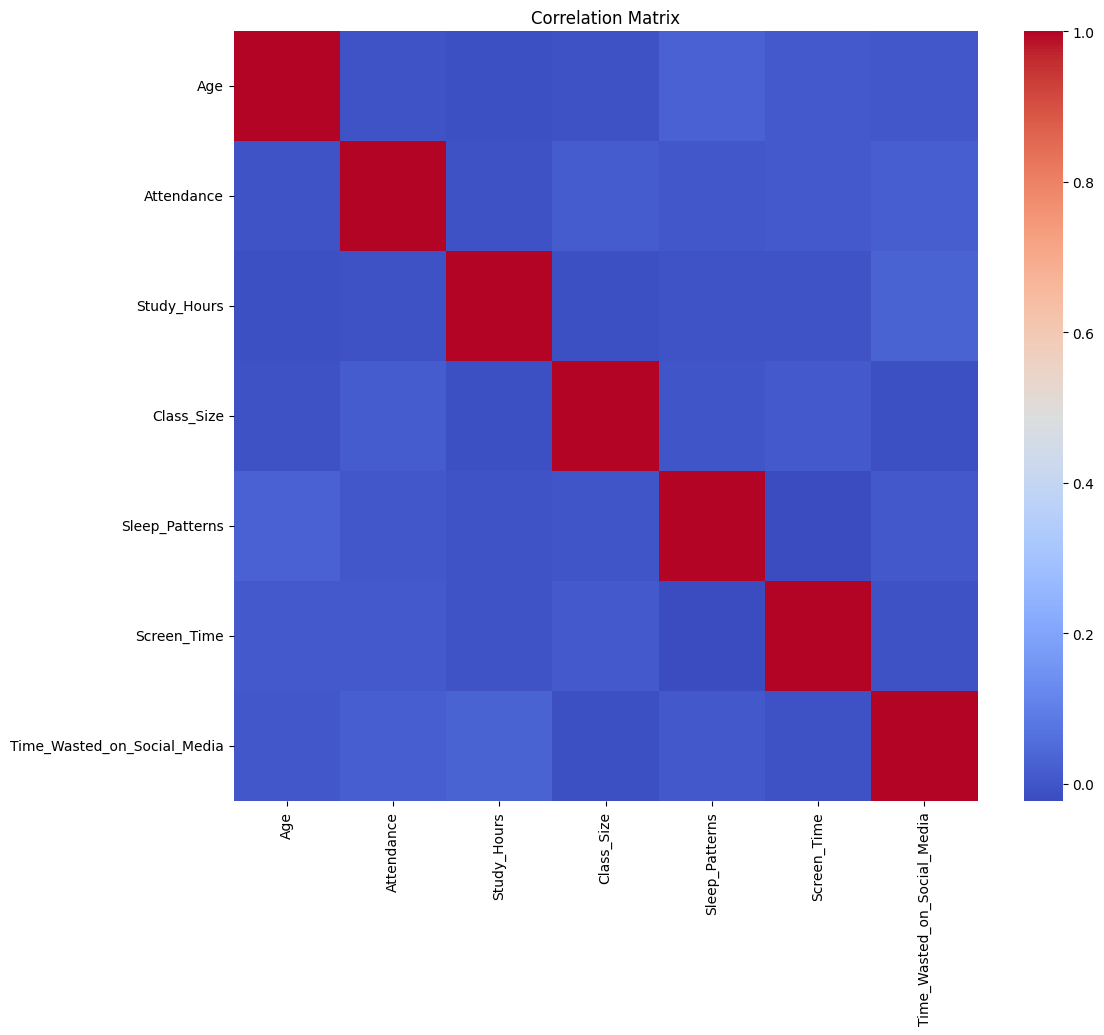

In [13]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')  # Set annot=True to display values
plt.title('Correlation Matrix')
plt.show()

**Important Note:** The red blocks only appear on the diagonal, meaning there are no strong positive correlations between different variables in this subset.

**Weak or No Correlation (Light Colors):**

All the off-diagonal elements (the ones that don't represent a variable correlated with itself) are light in color. This indicates weak or no linear correlation between the variables shown (Age, Attendance, Study_Hours, Class_Size, Sleep_Patterns, Screen_Time, and Time_Wasted_on_Social_Media).

In [14]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
encoder = OrdinalEncoder()
df['Grades_Encoded']=encoder.fit_transform(df[['Grades']])

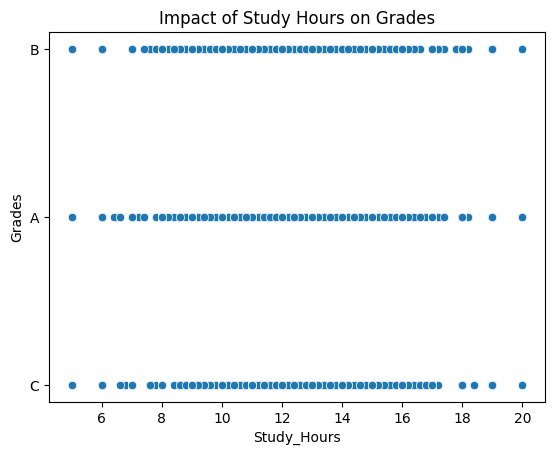

In [16]:
sns.scatterplot(x='Study_Hours', y='Grades', data=df)
plt.title('Impact of Study Hours on Grades')
plt.show()

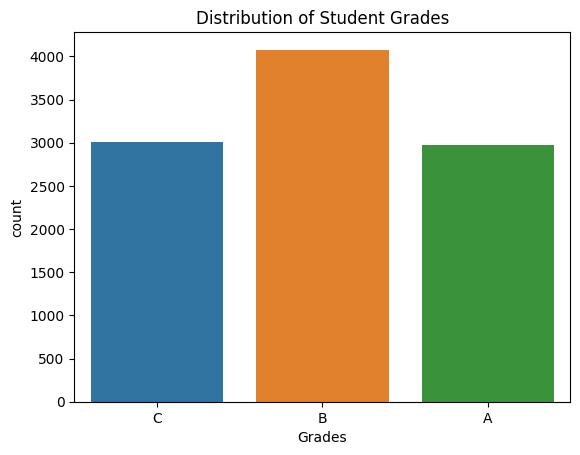

In [17]:
categories = ['C', 'B', 'A'] 
sns.countplot(x='Grades', data=df_imputed, order=categories) #Order the bars
plt.title('Distribution of Student Grades')
plt.show()


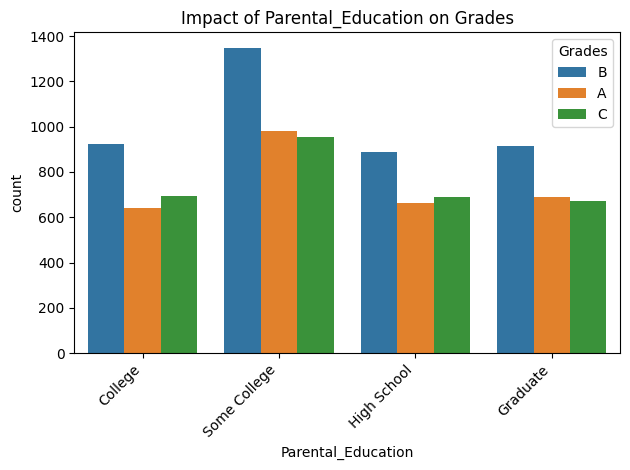

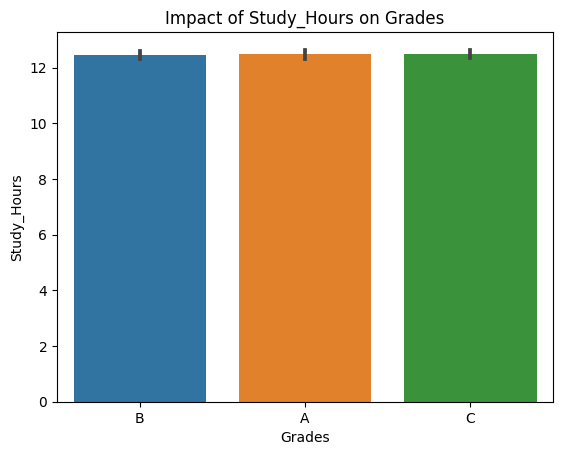

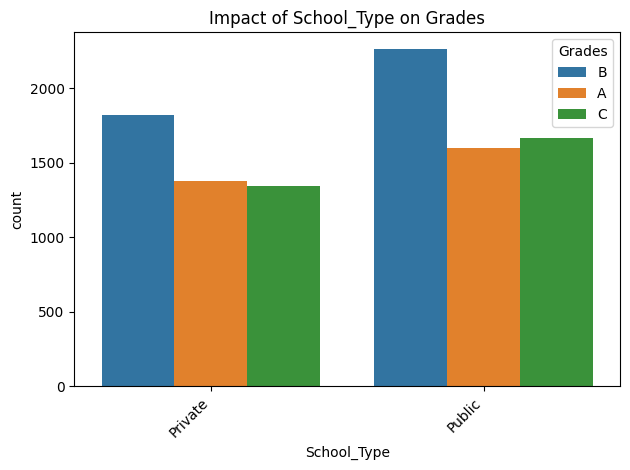

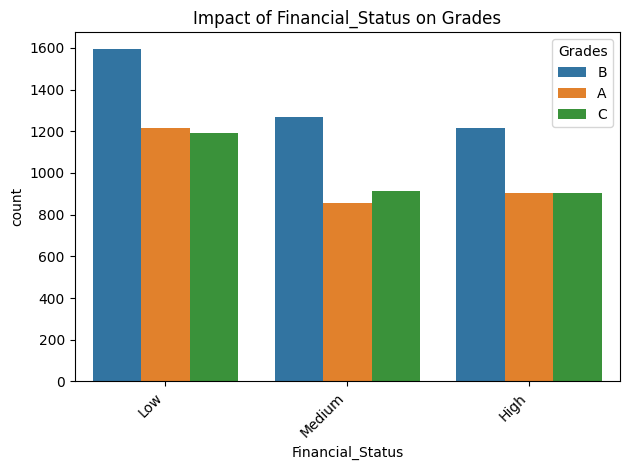

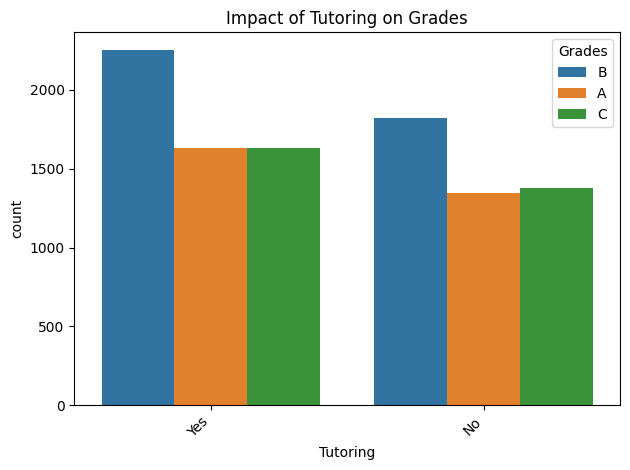

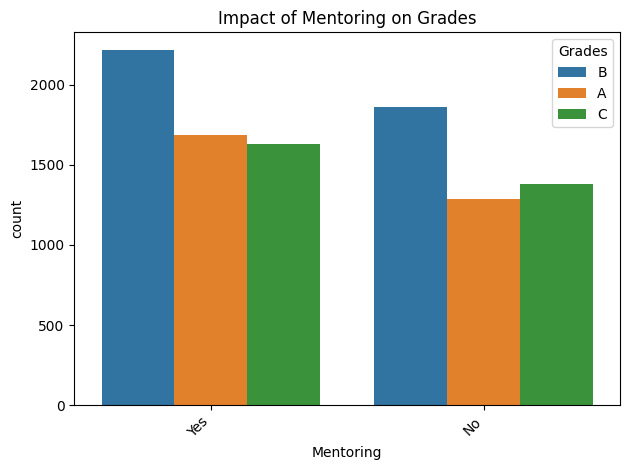

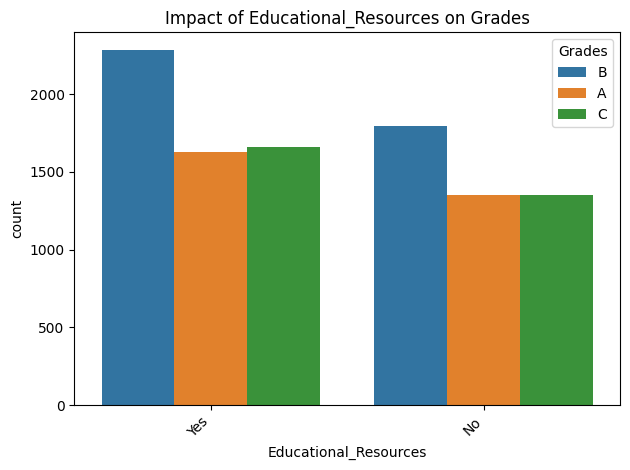

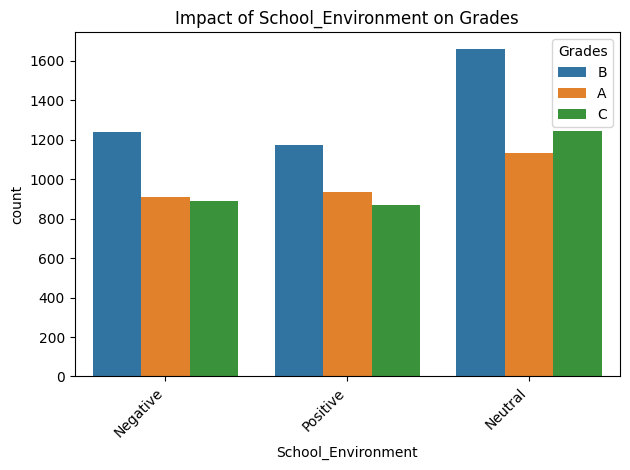

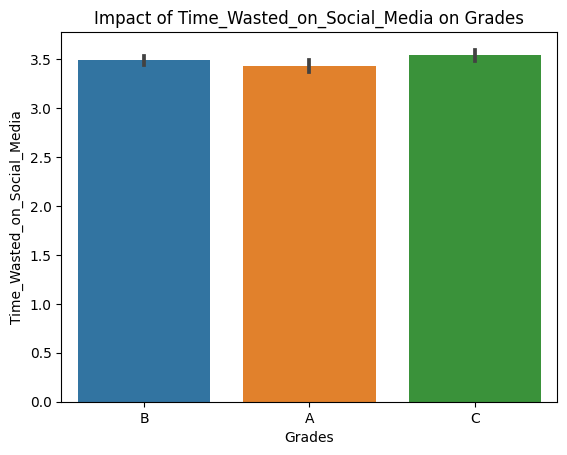

In [18]:
factors_to_analyze = ['Parental_Education', 'Study_Hours', 'School_Type', 'Financial_Status', 'Tutoring', 'Mentoring', 'Educational_Resources', 'School_Environment', 'Time_Wasted_on_Social_Media']

for factor in factors_to_analyze:

    if factor in categorical_cols: #Use countplot for categorical variables
      sns.countplot(x=factor, hue='Grades', data=df)
      plt.title(f'Impact of {factor} on Grades')
      plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if needed
      plt.tight_layout() # Adjust layout to prevent labels from overlapping
      plt.show()
    elif factor in numerical_cols: #Use barplot for numerical variables
      sns.barplot(x='Grades', y=factor, data=df)
      plt.title(f'Impact of {factor} on Grades')
      plt.show()

1. Tutoring and Grade Distribution:

  * "Yes" Tutoring: Among students who received tutoring, the most common grade is "B," followed by "A," and then "C."
  * "No" Tutoring: Among students who did not receive tutoring, the distribution is slightly different. "B" is still the most frequent, but the number of "A" grades is notably lower, and the number of "C" grades is slightly higher compared to the "Yes" tutoring group.

2. Impact of Tutoring:

  * Increased "A" Grades: A higher proportion of students who received tutoring achieved an "A" grade compared to those who did not. This suggests that tutoring might have a positive impact on achieving higher grades.
  * Reduced "C" Grades: There's a slight decrease in the proportion of "C" grades among students who received tutoring.
  * "B" Grades Remain High: While tutoring seems to have a positive influence on "A" grades, the number of "B" grades remains relatively high in both groups. This could indicate that other factors also play a significant role in achieving a "B" grade.

3. Potential Implications:

  * Tutoring Effectiveness: The data suggests that tutoring could be an effective intervention for improving student grades, particularly for those aiming for an "A."

**Grade Distribution by Mentoring Status:**

- "Yes" Mentoring: Among students who had mentors, the most frequent grade is "B," followed by "A," and then "C."
- "No" Mentoring: The distribution is similar for students without mentors, with "B" being the most common, followed by "A," and then "C."
Impact of Mentoring:
Slightly Higher "A"s with Mentoring: A slightly higher number of students who had mentors achieved an "A" grade compared to those who didn't have mentors.

----

This suggests a potential positive influence of mentoring on achieving higher grades.
Similar "B" and "C" Trends: The counts of "B" and "C" grades are relatively similar between the two groups (mentored vs. not mentored).

**Potential Implications:**

Mentoring's Potential Benefit: The data hints at a possible positive relationship between mentoring and achieving higher grades, particularly "A"s.


1. **Grade Distribution Across Parental Education Levels:**
- **"College":** Among students whose parents' highest education is "College," the most frequent grade is "B," followed by "A," and then "C."
- **"Some College":** The trend is similar for students whose parents attended "Some College," with "B" being the most frequent, followed by "A," and then "C." However, the overall count in this category is the highest.
- **"High School":** For students whose parents' highest education is "High School," the distribution is slightly different. The count of "B" grades is still the highest, but the count of "C" grades is relatively higher compared to the "College" and "Some College" categories.
- **"Graduate":** Students whose parents are "Graduates" show a similar pattern to the "College" and "Some College" groups, with "B" being the most common, followed by "A," and then "C."


2. **Impact of Parental Education on Grades:**

- **Higher Parental Education, Potentially Higher "A"s:** There is a tendency, though not absolute, for the proportion of "A" grades to be slightly higher in the "College," "Some College," and "Graduate" categories compared to the "High School" category. This suggests that higher parental education might be associated with a slightly increased likelihood of students achieving higher grades.
- **"B" Grade Consistency:** The "B" grade remains the most frequent across all parental education levels.
"C" Grades and Lower Parental Education: The "High School" category shows a slightly higher proportion of "C" grades compared to the other categories, suggesting that students whose parents have a high school education might be slightly more likely to receive lower grades.

3. **Potential Implications:**
Parental Education as a Factor: The data hints at parental education being a potential factor influencing student grades.

4. **Targeted Interventions:** The data suggests that students whose parents have lower levels of education might benefit from additional support and resources.
Holistic Approach: InvestInMinds should consider a holistic approach that addresses multiple factors, recognizing that parental education is just one piece of the puzzle.


1. **Grade Distribution Across School Types:**
   
- **"Private":** Among students attending private schools, the most frequent grade is "B," followed by "A," and then "C."
- **"Public":** The distribution is similar for students attending public schools, with "B" being the most common, followed by "A," and then "C."

2. **Impact of School Type on Grades:**
   
- **Similar Trends:** The overall patterns of grade distribution are quite similar between private and public schools. Both show a higher concentration of "B" grades, followed by "A" and then "C."
- **Slight Variations:** There are some minor variations in the heights of the bars, suggesting slightly different proportions of grades between the two school types. However, these differences don't appear to be substantial at first glance.

3. **Potential Implications:**
School Type Might Not Be the Dominant Factor: The data suggests that the type of school (private or public) might not be the most influential factor in determining student grades, as the distributions are relatively similar.
----
**In summary**, the chart suggests that school type alone might not be a strong predictor of student grades, and other factors are likely playing a more significant role.  InvestInMinds should consider this when developing strategies to support student success



- **Holistic Understanding:** InvestInMinds should consider a holistic understanding of student success, recognizing that financial status is just one factor among many.
- **Focus on Multifaceted Support:** Given the relatively consistent grade distributions, InvestInMinds might want to focus on providing multifaceted support that addresses various needs, such as academic resources, mentoring, tutoring, and socio-emotional support, rather than solely focusing on financial assistance.
- **Further Research:** InvestInMinds could conduct further research to explore how financial status interacts with other factors to affect student grades. They might also want to investigate the specific challenges faced by students from different financial backgrounds and how these challenges can be addressed through targeted interventions.
----
**In summary**, the chart suggests that financial status alone might not be a strong predictor of student grades, and other factors are likely playing a more significant role.  InvestInMinds should consider this when developing strategies to support student success. They should focus on a wide range of support mechanisms and conduct further research to gain a deeper understanding of the complex factors influencing student outcomes.

1. **Grade Distribution Across Resource Availability:**
- **"Yes" Resources:** Among students with access to educational resources, the most frequent grade is "B," followed by "A," and then "C."
- **"No" Resources:** The trend is similar for students without access to resources, with "B" being the most common, followed by "A," and then "C."

2. **Impact of Educational Resources on Grades:**
- **Slightly Higher "A"s with Resources:** There appears to be a slightly higher proportion of "A" grades among students who have access to educational resources compared to those who don't.
- **Similar "B" and "C" Trends:** The counts of "B" and "C" grades are relatively similar between the two groups (resource access vs. no access).

3. **Potential Implications:**
Resources Might Have a Positive Influence: The data hints at a possible positive relationship between access to educational resources and achieving higher grades, particularly "A"s.
----
**Resource Provision as a Potential Strategy:** The data suggests that providing educational resources could be a beneficial strategy for improving student outcomes.
Targeted Resource Allocation: InvestInMinds might consider focusing on providing resources to students who lack access, particularly those who are aiming for higher grades.



In [21]:
X = df.drop(['Grades', 'Grades_Encoded'], axis=1)
y = df['Grades_Encoded']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

Accuracy: 0.368107302533532
              precision    recall  f1-score   support

         0.0       0.29      0.15      0.20       583
         1.0       0.39      0.76      0.51       788
         2.0       0.32      0.09      0.14       642

    accuracy                           0.37      2013
   macro avg       0.33      0.33      0.28      2013
weighted avg       0.34      0.37      0.30      2013



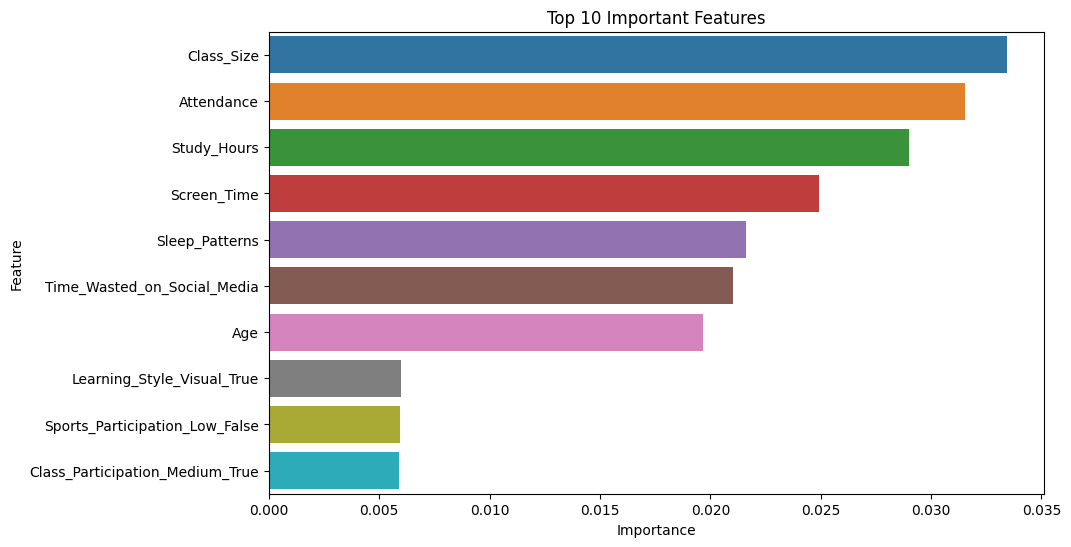

                             Feature  Importance
3                         Class_Size    0.033442
1                         Attendance    0.031545
2                        Study_Hours    0.028996
5                        Screen_Time    0.024912
4                     Sleep_Patterns    0.021602
6        Time_Wasted_on_Social_Media    0.021043
0                                Age    0.019685
144       Learning_Style_Visual_True    0.005971
161   Sports_Participation_Low_False    0.005942
42   Class_Participation_Medium_True    0.005911


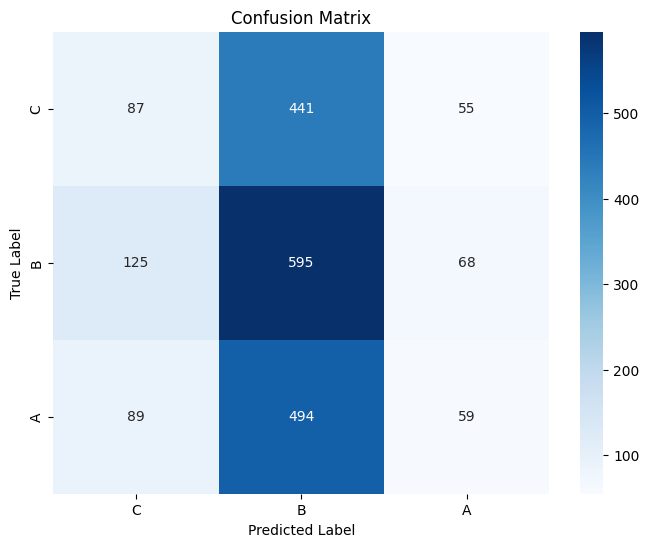

In [25]:
X = pd.get_dummies(X, columns=X.select_dtypes(exclude=np.number).columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


feature_importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))  # Show top 10 features
plt.title('Top 10 Important Features')
plt.show()


print(importance_df.head(10))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=categories, yticklabels=categories)  # Use original grade labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

1. **Feature Importance Ranking:**
- `Class_Size` is the most important feature, having the longest bar. This suggests that the size of the class has the strongest influence on the model's predictions (student grades).
- `Attendance` is the second most important feature, indicating a strong correlation between attendance and grades.
- `Study_Hours` is the third most important feature, which aligns with common expectations about academic success.
- `Screen_Time` and `Sleep_Patterns` also appear to be significant factors.
- `Time_Wasted_on_Social_Media` has a moderate level of importance.
- `Age` shows a relatively lower importance compared to the top features.
`Stress_Levels_Low`, `Parental_Involvement_High`, and `Professor_Quality_Low` have the lowest importance among the top 10, but still contribute to the model's predictive power.
----
2. **Interpretation:**
   
* The model suggests that factors related to academic engagement (Class_Size, Attendance, Study_Hours) and lifestyle (Screen_Time, Sleep_Patterns) are the most influential predictors of student grades.
* While Age, Stress Levels, Parental Involvement, and Professor Quality make a contribution, their impact is comparatively smaller.



1. **Accuracy:**
- Overall accuracy is calculated as the sum of correctly classified instances divided by the total number of instances.
   (87 + 595 + 59) / (87 + 441 + 55 + 125 + 595 + 68 + 89 + 494 + 59) = 741 / 2013 ≈ 0.368 or 36.8%
    This means the model is only accurate about 36.8% of the time, which is not very good.
  
  ----
  
2. **Precision:**
- Precision for each class measures how many of the instances predicted as that class were actually correct.
   * Precision for A: 59 / (55 + 68 + 59) = 59 / 182 ≈ 0.324 (32.4%)
   * Precision for B: 595 / (441 + 595 + 494) = 595 / 1530 ≈ 0.389 (38.9%)
   * Precision for C: 87 / (87 + 125 + 89) = 87 / 301 ≈ 0.289 (28.9%)

  ----
  
3. **Recall (Sensitivity or True Positive Rate):**
- Recall for each class measures how many of the actual instances of that class were correctly predicted.
    * Recall for A: 59 / (55 + 68 + 59) = 59 / 182 ≈ 0.324 (32.4%)
   * Recall for B: 595 / (441 + 595 + 494) = 595 / 1530 ≈ 0.389 (38.9%)
   * Recall for C: 87 / (87 + 125 + 89) = 87 / 301 ≈ 0.289 (28.9%)

----

4. **F1-Score:**
   
- The F1-score is the harmonic mean of precision and recall. It balances both metrics.
   * F1-Score for A: (2 * 0.324 * 0.324) / (0.324 + 0.324) ≈ 0.324
    * F1-Score for B: (2 * 0.389 * 0.389) / (0.389 + 0.389) ≈ 0.389
   * F1-Score for C: (2 * 0.289 * 0.289) / (0.289 + 0.289) ≈ 0.289
----
**Key Observations and Potential Issues:**
  * Low Accuracy: The overall accuracy of 36.8% indicates that the model is not performing very well.
  * Confusion between B and C: The largest confusion is between grades B and C. The model frequently misclassifies students with an actual grade of C as B (441 instances) and vice versa (494 instances). This suggests that the features the model is using might not be effectively distinguishing between these two grades”and we proved that earlier”.
  Balanced Precision and Recall: For each class, the precision and recall are the same, leading to identical F1-scores. This indicates a balanced performance in terms of correctly predicting positive cases and finding all actual positive cases, but the overall values are quite low.
 **Possible Data Imbalance:** While not explicitly visible from the confusion matrix alone, if the actual dataset has a significant imbalance in the number of students with different grades (e.g., many more students with B's than A's or C's), this could affect the model's performance.
 